In [1]:
include("duales.jl")
include("integracion_taylor.jl")

Main.IntegTaylor

In [2]:
using Pkg
Pkg.status()

Status `C:\Users\leoml\Documents\2024-1_TSFC2\Project.toml`
  [7073ff75] IJulia v1.24.2
⌃ [98b081ad] Literate v2.14.1
⌃ [91a5bcdd] Plots v1.38.17
  [6aa5eb33] TaylorSeries v0.15.2
Info Packages marked with ⌃ have new versions available and may be upgradable.


In [3]:
using .DifAutom, .IntegTaylor, Plots, TaylorSeries, LinearAlgebra

In [16]:
A = [1,2,3,4,5,6]

6-element Vector{Int64}:
 1
 2
 3
 4
 5
 6

In [17]:
x₁,x₂,x₃ = A[1:3]

3-element Vector{Int64}:
 1
 2
 3

In [18]:
x₁

1

In [22]:
function Lorentz!(du,u,p,t)
    
    q, m, E, B = p
    k = q/m
    
    x₁, x₂, x₃ = u[1:3]
    v₁, v₂, v₃ = u[4:6]
    
    E₁, E₂, E₃ = E(x₁,x₂,x₃,t)
    B₁, B₂, B₃ = B(x₁,x₂,x₃,t)
    
    du[1] = v₁
    du[2] = v₂
    du[3] = v₃
    
    du[4] = k*(E₁ + v₂*B₃ - v₃*B₂)
    du[5] = k*(E₂ + v₃*B₁ - v₁*B₃)
    du[6] = k*(E₃ + v₁*B₂ - v₂*B₁)
    
end

Lorentz! (generic function with 1 method)

In [23]:
E(x,y,z,t) = [0.0,0.0,0.0]

E (generic function with 2 methods)

In [502]:
μ₀ = 1e-7
k = μ₀/(4*π)
M = [0.0,0.0,1e10]
B(x,y,z,t) = k*(3*[x,y,z]*([x,y,z]⋅M)/norm([x,y,z])^5 - M/norm([x,y,z])^3)

B (generic function with 2 methods)

In [497]:
m = 1
q = -0.5
p =[q,m,E,B];

In [498]:
x0 =[-1.0,0.0,0.1,0.01,0.0,0.0]

t_ini = 0.0

t_fin = 10.0

orden = 20

ϵ = 1e-20

t, x, error = integracion_taylor(Lorentz!, x0, t_ini, t_fin, orden, ϵ, p; Nt = 1000, longitud = false)

([0.0, 3.85417541193262, 7.295912269113634, 10.0], [[-1.0, 0.0, 0.1, 0.01, 0.0, 0.0], [-0.961596084878028, -0.0028190522310071083, 0.10004178820724166, 0.009892793385042824, -0.0014599963588155269, 3.239865889726805e-5], [-0.9280372072714584, -0.010313221030294872, 0.10031151257907256, 0.009573462855980187, -0.0028862605697233573, 0.00013531026874507971], [-0.9027171488702639, -0.019736396927620477, 0.10087187753312415, 0.009128533418919567, -0.004072739393847273, 0.0002875264326513029]], true)

In [499]:
xy = [(x[i][1],x[i][2]) for i in 1:length(x)]
xz = [(x[i][1],x[i][3]) for i in 1:length(x)]
yz = [(x[i][2],x[i][3]) for i in 1:length(x)]
z = [x[i][3] for i in 1:length(x)];

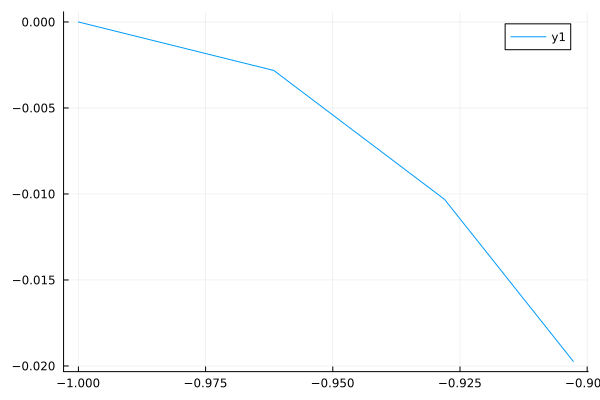

In [501]:
plot(xy)

In [503]:
function meshgrid(xi,xf,xn,yi,yf,yn,zi,zf,zn)
    gridx = [0.0 for i in 1:(xn*yn*zn)]
    gridy = [0.0 for i in 1:(xn*yn*zn)]
    gridz = [0.0 for i in 1:(xn*yn*zn)]
    x = range(xi,xf,xn)
    y = range(yi,yf,yn)
    z = range(zi,zf,zn)
    l = 0
    for i in 1:xn
        for j in 1:yn
            for k in 1:zn
                l +=1
                gridx[l] = x[i]
                gridy[l] = y[j]
                gridz[l] = z[k]
            end
        end
    end
    return gridx, gridy, gridz
end

meshgrid (generic function with 3 methods)

In [504]:
xi, xf = -10, 10
yi, yf = -10, 10
zi, zf = -10, 10
xn, yn, zn = 21, 21, 21
x, y, z = meshgrid(xi,xf,xn,yi,yf,yn,zi,zf,zn);

In [505]:
MF = B.(x,y,z,0.0)
MF = ((xf-xi)/xn) * MF ./ norm.(MF) 
xx = [MF[i][1] for i in 1:(xn*yn*zn)]
yy = [MF[i][2] for i in 1:(xn*yn*zn)]
zz = [MF[i][3] for i in 1:(xn*yn*zn)];

[ Info: Saved animation to C:\Users\leoml\Documents\2024-1_TSFC2\tareas\Leonel\tmp.gif


Plots.AnimatedGif("C:\\Users\\leoml\\Documents\\2024-1_TSFC2\\tareas\\Leonel\\tmp.gif")
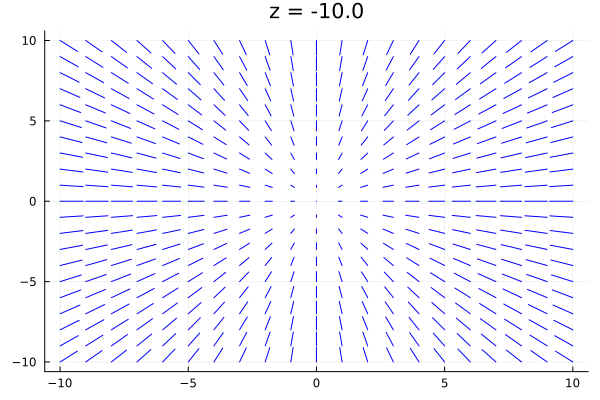

In [457]:
@gif for j in 1:zn
    plot([x[j],x[j] + xx[j]],[y[j],y[j] + yy[j]], leg = false, color = "blue")
    for i in (j+zn):zn:(xn*yn*zn)
        plot!([x[i],x[i] + xx[i]],[y[i],y[i] + yy[i]], leg = false, color = "blue")
    end
    title!("z = $(z[j])")
end

In [514]:
y[1:xn:end]

(-10.0, -10.0)

In [491]:
z[2:zn:end]

441-element Vector{Float64}:
 -9.0
 -9.0
 -9.0
 -9.0
 -9.0
 -9.0
 -9.0
 -9.0
 -9.0
 -9.0
 -9.0
 -9.0
 -9.0
  ⋮
 -9.0
 -9.0
 -9.0
 -9.0
 -9.0
 -9.0
 -9.0
 -9.0
 -9.0
 -9.0
 -9.0
 -9.0

In [515]:
plot1 = plot()
k = 1
for i in (k+yn):yn:(xn*yn*zn)
    for j in (i+zn):zn:(xn*yn*zn)
        plot!([x[j],x[j] + xx[j]],[y[j],y[j] + yy[j]], leg = false, color = "blue")
    end
    title!("y = $(y[k])")
end
plot1

InterruptException: InterruptException: